# In this notebook we will run the algorithms without any resampling and without any set of hyperparameters, so they can be used as a benchmark

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,2022,12,4,...,1,0,0,0,0,0,1,1,0,0


# 4 labels: Car, Bike, Walk, Public Trasport

In [6]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [7]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,1,6,0,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,1,6,0,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,12,4,0,...,1,0,0,0,0,0,1,1,0,0


In [8]:
X, y = shuffle(X, y, random_state=42)

In [9]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
450271,2,0,59,1,1,0,1,5,3,0,...,0,0,0,1,0,0,0,1,0,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,1,1,0,0,0,0,1,0
74133,3,1,55,1,3,1,0,6,4,0,...,0,0,0,0,1,0,0,0,0,1
343899,2,0,62,1,1,0,0,8,1,0,...,0,0,0,1,0,0,0,1,0,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,1,0,0,1,0,0,0,1,0,0
365838,2,1,42,1,0,0,0,9,4,0,...,0,0,0,1,0,0,0,1,0,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,0,1,0,0,0,0,0,1
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,0,0,1,0,0,0,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [11]:
X_train.shape, X_test.shape

((553644, 36), (138411, 36))

# Logistic Regression

In [13]:
logreg_model=LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     63419
           1       0.61      0.54      0.57     35365
           2       0.76      0.86      0.80     34705
           3       0.51      0.08      0.14      4922

    accuracy                           0.75    138411
   macro avg       0.67      0.58      0.59    138411
weighted avg       0.73      0.75      0.73    138411



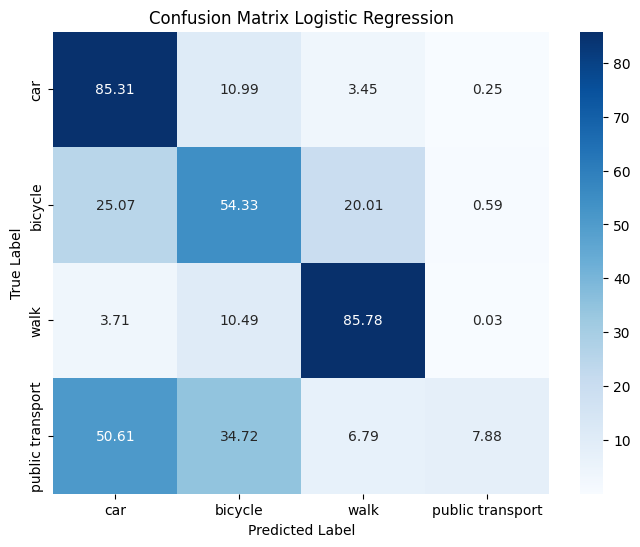

In [14]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

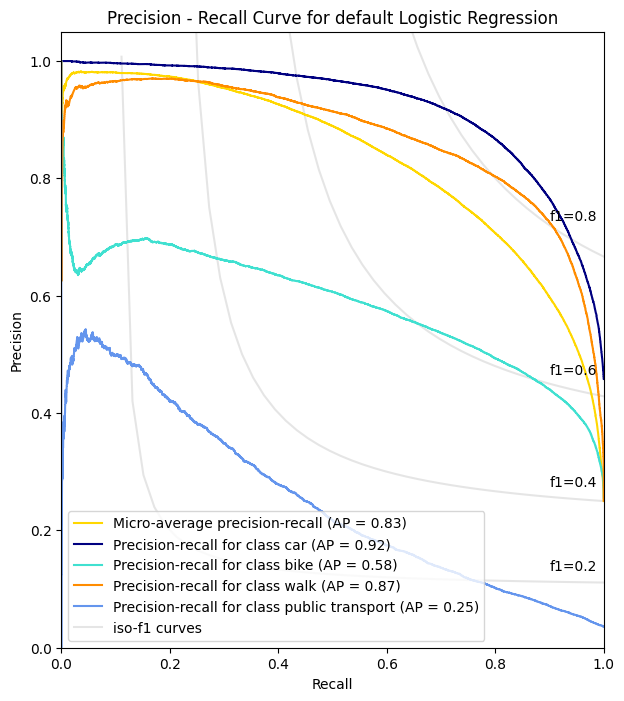

In [16]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for default Logistic Regression")

plt.show()

# Decision Tree

In [17]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=25)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     63419
           1       0.66      0.68      0.67     35365
           2       0.84      0.83      0.84     34705
           3       0.40      0.38      0.39      4922

    accuracy                           0.78    138411
   macro avg       0.69      0.69      0.69    138411
weighted avg       0.78      0.78      0.78    138411



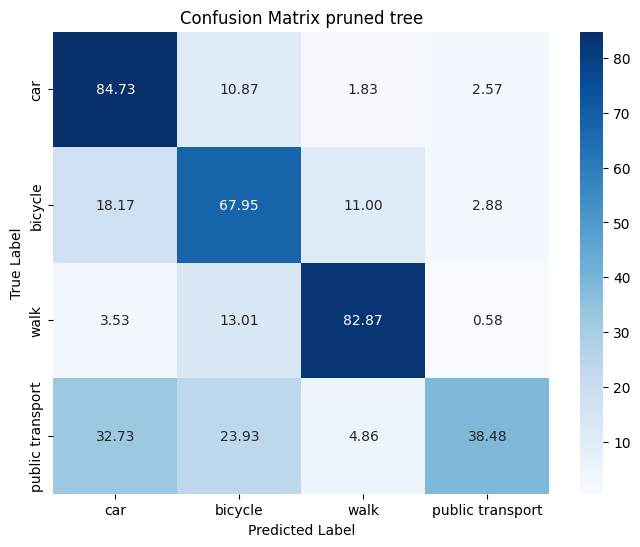

In [18]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

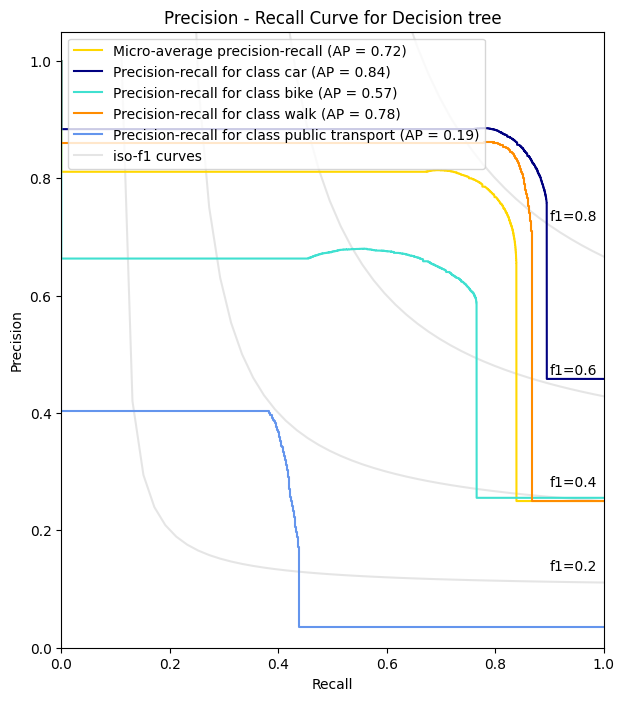

In [20]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Random Forest

In [21]:
X.shape

(692055, 36)

In [22]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     63419
           1       0.80      0.80      0.80     35365
           2       0.88      0.92      0.90     34705
           3       0.82      0.38      0.52      4922

    accuracy                           0.87    138411
   macro avg       0.85      0.76      0.78    138411
weighted avg       0.87      0.87      0.87    138411



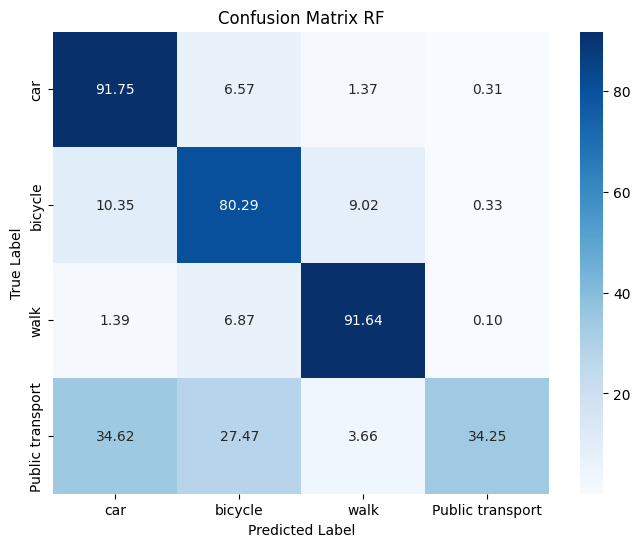

In [22]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

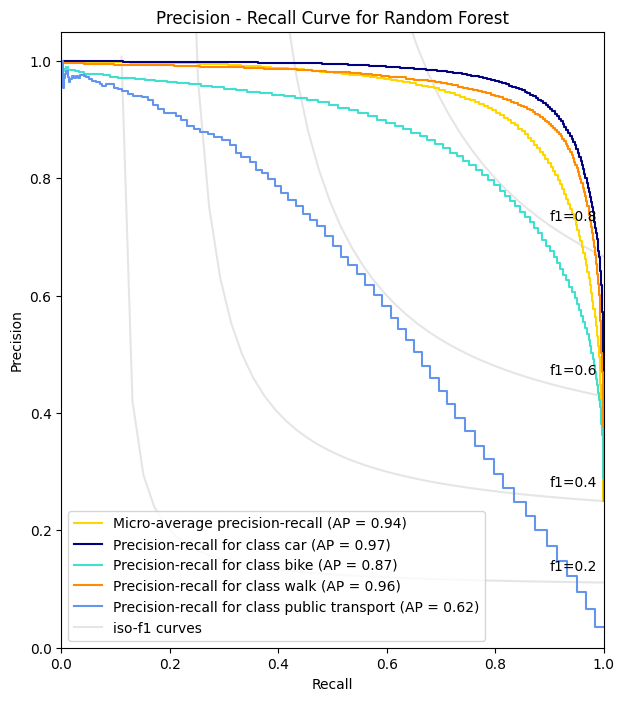

In [24]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# XGBoost

In [12]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     63419
           1       0.65      0.69      0.67     35365
           2       0.84      0.86      0.85     34705
           3       0.67      0.32      0.43      4922

    accuracy                           0.80    138411
   macro avg       0.76      0.68      0.70    138411
weighted avg       0.80      0.80      0.80    138411



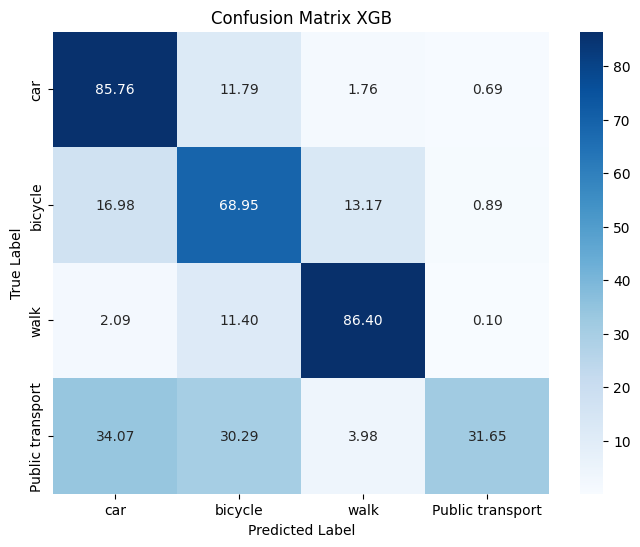

In [26]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

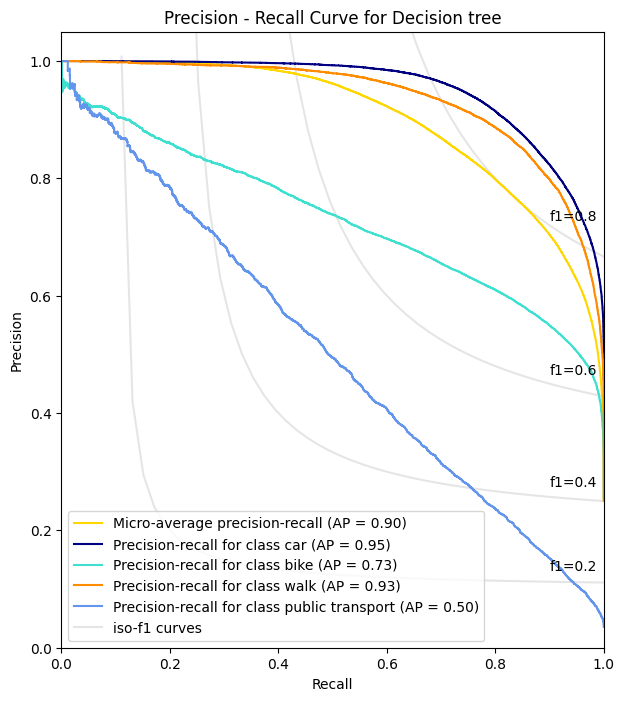

In [28]:
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=xgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(xgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()